In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from src import plotting_player_location_frame

pd.set_option('display.max_columns', 100)

In [2]:
df_players = pd.read_csv('../data/players_csv', index_col=0) #reading in players csv

In [3]:
df_tracking = pd.read_csv('../data/SecondSpectrum_Data.csv', index_col=0) #reading in tracking data

In [4]:
df_tracking.head()

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed
0,1,0,0.00,1583709073745,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",False,home,"[0.7, 0.04, 0.16]",11.63
1,1,1,0.04,1583709073785,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[0.84, 0.01, 0.16]",11.70
2,1,2,0.08,1583709073825,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[1.19, -0.01, 0.16]",11.64
3,1,3,0.12,1583709073865,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[1.74, -0.04, 0.16]",11.60
4,1,4,0.16,1583709073905,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[2.18, -0.14, 0.16]",11.55


In [5]:
df_marking = pd.read_csv('../data/marking_data.csv', index_col=0) #reading in marking data from saved csv

In [6]:
passes_outcomes = pd.read_csv('../data/passing_pos.csv', index_col=0) #reading in passing_pos from eda_1 notebook that contains feature engineering

In [7]:
passes_outcomes

,id,optaId,gameId,period,sequenceIdx,markingType,gameClock,wallClock,frameIdx,attTeamId,defTeamId,playerId,passerDefId,passerDefDist,receiverId,vel,air,breaksOffsideLine,passLoc,direction,defBehindPasser,defBehindReceiver,attAheadPasser,attAheadReceiver,defBypassed,passDifficulty,defInBox,attInBox,passerVel,events,startClock,endClock,startWallClock,endWallClock,startFrameIdx,endFrameIdx,teamId,isContested,startType,teamXg,verticalPassing,verticalCarrying,receptionLoc,receptionVel,startLoc,endLoc,distance,shooterId,shotLoc,goalDist,shooterDefDist,shooterDefId,defGoalside,xG,gkDist,gkVel,gkLoc,takerId,attInGkBox,defInGkBox,shortOption,nearPostDefender,farPostDefender,crossSwing,passOutcome
0,54eb45e2-1933-45b8-99d2-87afdd7e440d,2.190066e+09,2044262,1,0,pass,0.04,1.583709e+12,1.0,1581.0,15154.0,55817.0,41626.0,8.45,96622.0,"[10.89, -4.75]",False,False,"[-0.32, -16.54, 0.0]",backward,7.0,11.0,0.0,4.0,-4.0,0.9694,1.0,0.0,"[0.49, -5.64]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
1,a5c0c393-8cab-4f60-b63d-aae338ae17f9,NaN,2044262,1,0,reception,1.16,1.583709e+12,29.0,NaN,NaN,96622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-12.36, -15.07, 0.0]","[1.55, -123.18]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,68b4e18d-cb3f-437b-a72d-0a51569b1093,2.190066e+09,2044262,1,0,pass,2.32,1.583709e+12,58.0,1581.0,15154.0,96622.0,202376.0,6.70,131840.0,"[12.16, 91.22]",False,False,"[-12.5, -18.7, 0.0]",square,11.0,11.0,5.0,6.0,0.0,0.9404,1.0,0.0,"[2.45, -79.78]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
3,fac1be3d-56b9-40f0-8d0e-f8dab85aef96,NaN,2044262,1,0,reception,4.36,1.583709e+12,109.0,NaN,NaN,131840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[-11.98, -54.86, 0.0]","[3.67, 49.92]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,8dff78d4-53ce-4378-a674-94724c6f8d6c,2.190066e+09,2044262,1,0,pass,4.40,1.583709e+12,110.0,1581.0,15154.0,131840.0,213665.0,4.70,85417.0,"[14.15, -63.37]",False,False,"[-11.88, -54.69, 0.0]",backward,11.0,11.0,6.0,7.0,0.0,0.9871,1.0,0.0,"[3.62, 50.44]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,a8cff272-5246-453d-81d0-5fde36a5f4c8,NaN,2044262,2,0,reception,2942.04,1.583716e+12,73551.0,NaN,NaN,137415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18.11, 0.94, 0.0]","[4.67, -112.46]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2199,6c8c5e83-1ce9-45a4-807d-38effbc84f0e,2.190082e+09,2044262,2,0,pass,2942.68,1.583716e+12,73567.0,1581.0,15154.0,137415.0,151933.0,0.42,217784.0,"[4.11, -147.94]",False,False,"[16.45, -2.86, 0.0]",forward,4.0,3.0,0.0,1.0,1.0,0.4446,1.0,0.0,"[4.94, -124.74]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,successful
2200,16548b5b-49c6-4616-b789-5cae7b56ae98,NaN,2044262,2,0,reception,2943.84,1.583716e+12,73596.0,NaN,NaN,217784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[20.46, 0.83, 0.0]","[6.08, -41.39]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
220

In [8]:
success_idx = []
incomplete_idx = []
turnover_idx = []

#grabbing indicies of nashville by passing outcome type

for index in passes_outcomes[passes_outcomes['attTeamId'] == 15154.0].index:
    if passes_outcomes['passOutcome'][index] == 'successful':
        success_idx.append(passes_outcomes['frameIdx'][index])
        
    if passes_outcomes['passOutcome'][index] == 'incomplete':
        incomplete_idx.append(passes_outcomes['frameIdx'][index])
        
    if passes_outcomes['passOutcome'][index] == 'turnover':
        turnover_idx.append(passes_outcomes['frameIdx'][index])

In [9]:
tracking_na = df_tracking.dropna() #Many missing values here, not sure if I will be allowed to plot the ball location for all passes

tracking_na['ball.xyz'] = tracking_na['ball.xyz'].apply(lambda x: ast.literal_eval(x)) #packing ball location out of string list

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
tracking_na[['ball_x','ball_y', 'ball_z']] = pd.DataFrame(tracking_na['ball.xyz'].tolist(), index=tracking_na.index) #adding unpacked floats into dataframe

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Location of Start of Pass by Outcome')

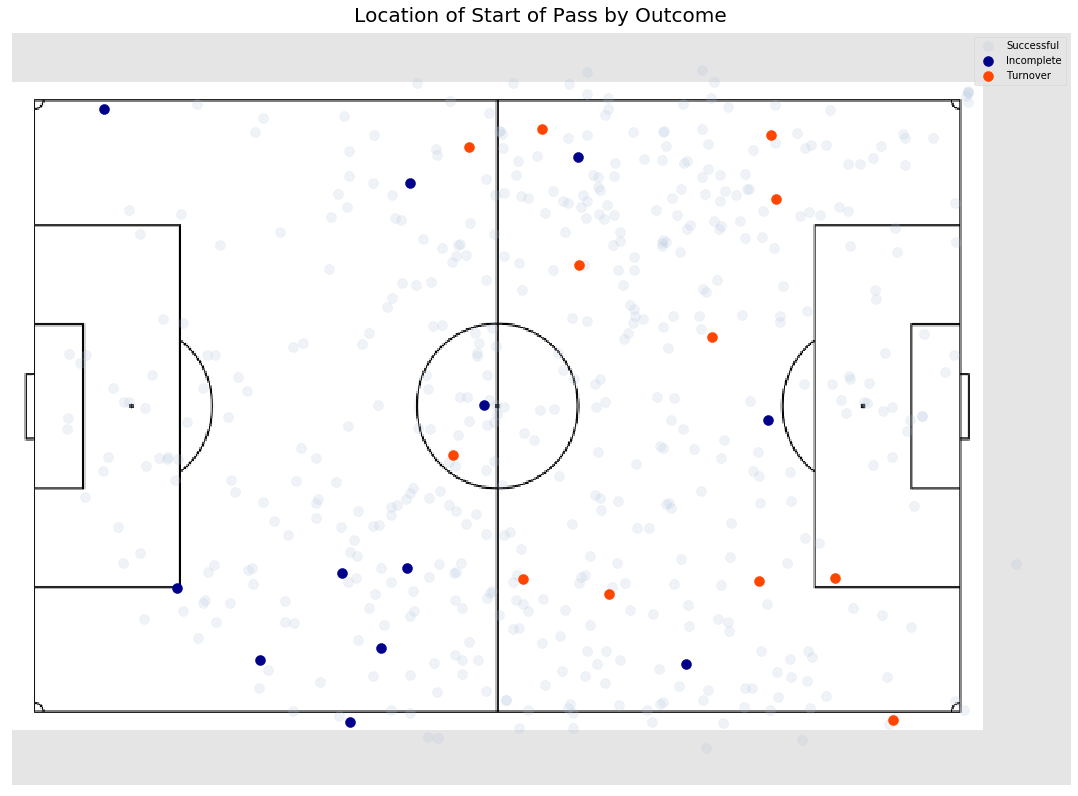

In [12]:
#plot for period 2, way too many missing values to make use of this. 

fig, ax = plt.subplots(figsize=(19, 18))
    
img = plt.imread('../printable-soccer-field-diagram.png')
ax.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29))

plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)]['ball_y'], alpha=0.20, s=100, label='Successful', c='lightsteelblue')
plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)]['ball_y'], s=100, label='Incomplete', c='darkblue')
plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)]['ball_y'], s=100, label='Turnover', c='orangered')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.title('Location of Start of Pass by Outcome', size=20, pad=10)
#plt.savefig('../Visuals/locationofpass_outcome.png', dpi=100)

I want to analyze these turnovers and incomplete passes more. Next steps are to create separate dfs for all turnovers, and right side only

In [13]:
turnover_incomplete_idx = np.concatenate((np.array(incomplete_idx), np.array(turnover_idx)), axis=0) #grabbing frame idx of turnovers & incomplete in first half

In [14]:
df_turnover_incomplete_nsc = tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_incomplete_idx)] # matching with tracking period 1, where the frame idx occurs

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
right_side_idx = df_turnover_incomplete_nsc[df_turnover_incomplete_nsc['ball_y'] < -10]['frameIdx'].values #this represents the indicies that occur on nashville's right side of the field

I have an intuition that Nashville SC is weak on this side of the field. Many turnovers and incomplete passes occur on this flank of the field. I want to do more investigation into our shape during these moments, and which players are giving the ball away in these positions

In [16]:
right_flank_passes = passes_outcomes[passes_outcomes['frameIdx'].isin(right_side_idx)] #frame index where ball is < -10

right_flank_passes.groupby('playerId').count().sort_values('id', ascending=False).iloc[:, 0] #passes given up in first half only on right side by player

playerId
151933.0    3
164480.0    3
41626.0     2
99117.0     2
119089.0    1
177928.0    1
Name: id, dtype: int64

In [17]:
all_passes = passes_outcomes[passes_outcomes['frameIdx'].isin(df_turnover_incomplete_nsc['frameIdx'].values)] #all passes in the first half

In [18]:
all_passes.groupby('playerId').count().sort_values('id', ascending=False)

,id,optaId,gameId,period,sequenceIdx,markingType,gameClock,wallClock,frameIdx,attTeamId,defTeamId,passerDefId,passerDefDist,receiverId,vel,air,breaksOffsideLine,passLoc,direction,defBehindPasser,defBehindReceiver,attAheadPasser,attAheadReceiver,defBypassed,passDifficulty,defInBox,attInBox,passerVel,events,startClock,endClock,startWallClock,endWallClock,startFrameIdx,endFrameIdx,teamId,isContested,startType,teamXg,verticalPassing,verticalCarrying,receptionLoc,receptionVel,startLoc,endLoc,distance,shooterId,shotLoc,goalDist,shooterDefDist,shooterDefId,defGoalside,xG,gkDist,gkVel,gkLoc,takerId,attInGkBox,defInGkBox,shortOption,nearPostDefender,farPostDefender,crossSwing,passOutcome
playerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
151933.0,7,7,7,7,7,7,7,7,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
41626.0,4,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
99117.0,4,4,4,4,4,4,4,4,4,4,4,3,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
164480.0,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
177928.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
213665.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
119089.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
213213.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
#creating dataframe to pass into 

player_pass_df = pd.DataFrame(all_passes.groupby('playerId').count().sort_values('id', ascending=False).iloc[:, 0])

player_pass_df.index = player_pass_df.index.astype(int)
player_pass_df.columns = ['bad_pass']

In [20]:
all_passes_players = pd.merge(df_players[df_players['optaId'].isin(all_passes.groupby('playerId').count().sort_values('id', ascending=False).iloc[:, 0].index.astype(int))], player_pass_df, left_on='optaId', right_index=True) #merging playerdata with groupby marking data

In [21]:
all_passes_players.sort_values(by='bad_pass', ascending=True, inplace = True) #sort values for plotting purposes

In [22]:
all_passes_players

,name,number,position,ssiId,optaId,optaUuid,opponent,bad_pass
22,D. Romney,4,LCB,2d4e6f77-b4c2-4a77-a903-9fa4b8bff949,213213,49hih9ka1cljgkihamec6b17t,away,1
29,H. Mukhtar,10,CAM,ad87de3c-9c65-4623-8a3d-76831d56b038,119089,94jvlb3r2cq9ryxco4fmkbmxh,away,1
31,R. Leal,8,LW,c4ce6bc5-6f29-4385-8efa-964c498af34d,213665,bwq89z2cncu4pscz9xs3a6kt1,away,2
34,D. Lovitz,2,LB,df3448b5-1384-43ed-ad52-fba226bc9155,177928,4kflkbicl4vmd7vftq4hdgyqd,away,2
21,E. Miller,15,RB,2651db82-f449-4232-bdf6-154798e0e325,164480,dnm3m8nto9bof5syhtb6w8es5,away,3
19,A. Godoy,20,LDM,16d1cf1a-1f2c-4802-9616-ce52e351b4dd,99117,4ajhe29nxseyo6wqg3hjdghcl,away,4
35,D. McCarty,6,RDM,eb0ccc58-beaa-44d1-81cc-07df76abaddc,41626,2m4iwb3oo5zzfbxrua7ver3kl,away,4
24,W. Zimmerman,25,RCB,5998bc4a-77ec-49cc-8736-184bd70d9d6d,151933,eooivgc2bc7bdbl1gq784ehn9,away,7


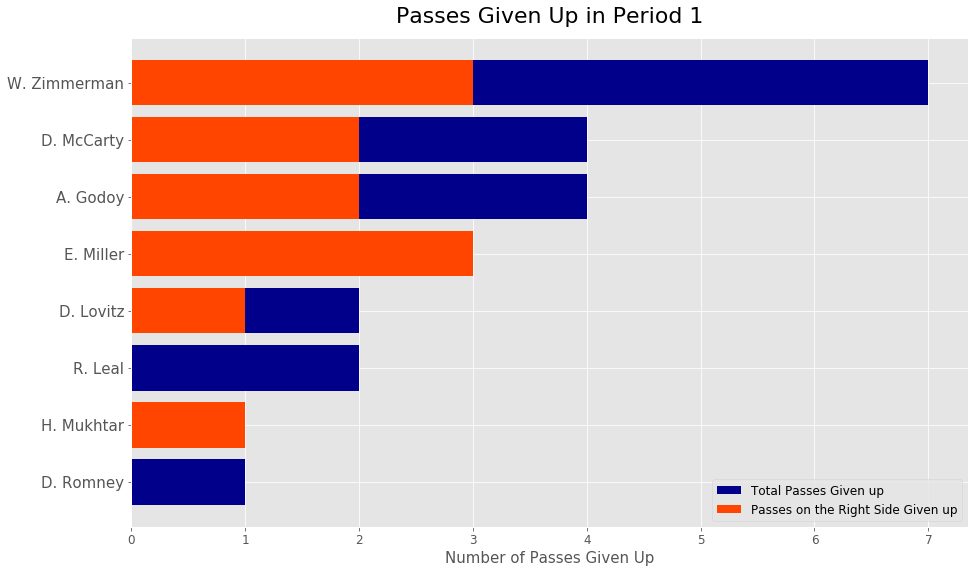

In [23]:
plt.figure(figsize=(15, 9))
plt.barh(all_passes_players['name'].values, all_passes_players['bad_pass'].values, label='Total Passes Given up', color='darkblue')
plt.barh(all_passes_players['name'].values, np.array([0, 1, 0, 1, 3, 2, 2, 3]), label='Passes on the Right Side Given up', color='orangered')
plt.title('Passes Given Up in Period 1', size=22, pad = 15)
plt.xlabel('Number of Passes Given Up', size=15)
plt.yticks(size=15)
plt.xticks(size=12)
plt.legend(fontsize='large')
#plt.savefig('../Visuals/passesgivenup_period1.png', dpi=100)

Zimmerman gave up 7 passes total in the first half. 

All of these passes occurred on the right side of the field 

In [24]:
#creating df with players with bad passes on right side only

player_right_pass = pd.DataFrame(right_flank_passes.groupby('playerId').count().sort_values('id', ascending=False).iloc[:, 0])
                                 
player_right_pass.index = player_right_pass.index.astype(int)
player_right_pass.columns = ['bad_pass']

In [25]:
player_right_pass

,bad_pass
151933,3
164480,3
41626,2
99117,2
119089,1
177928,1


In [26]:
player_right_pass_df = pd.merge(df_players[df_players['optaId'].isin(all_passes.groupby('playerId').count().sort_values('id', ascending=False).iloc[:, 0].index.astype(int))], player_right_pass, left_on='optaId', right_index=True)

player_right_pass_df.sort_values(by='bad_pass', ascending=True, inplace=True)

In [27]:
top = np.ones((23, 99)) * 0.33
middle = np.ones((20, 99)) * 0.16
bottom = np.ones((23, 99)) * 0.5

data = np.concatenate((top, middle, bottom))


In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('seaborn-whitegrid')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

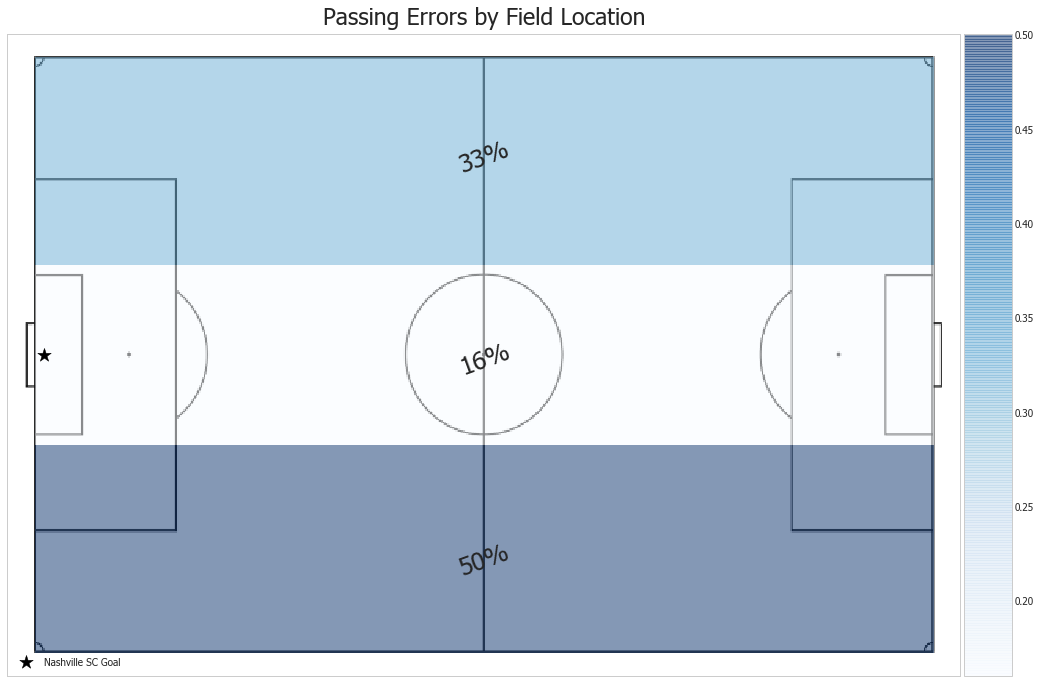

In [29]:
fig, ax = plt.subplots(figsize=(18, 13))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


img = plt.imread('../printable-soccer-field-diagram.png')
ax.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29), alpha=0.9)
im = ax.imshow(data, cmap='Blues', alpha=0.5, extent=(-49, 49, -32.5, 32.5))

fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_xlim(-52, 52)
ax.set_ylim(-35, 35)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Passing Errors by Field Location', loc='center', size=23, pad=10)
ax.text(-3, -24, '50%',fontsize=25, rotation=20)
ax.text(-3, -2, '16%',fontsize=25, rotation=20)
ax.text(-3, 20, '33%',fontsize=25, rotation=20)

ax.scatter(-48, 0, marker='*', s=200, c='k', label='Nashville SC Goal')
ax.legend(loc='lower left', fontsize='medium')
#plt.savefig('../Visuals/passingerrors_fieldloc.png', dpi=100);

In [30]:
left = np.ones((66, 33)) * 0.16
middle = np.ones((66,33)) * 0.5 #12
right = np.ones((66, 33)) * 0.33 #8

In [31]:
data1 = np.concatenate((left, middle, right), axis=1)

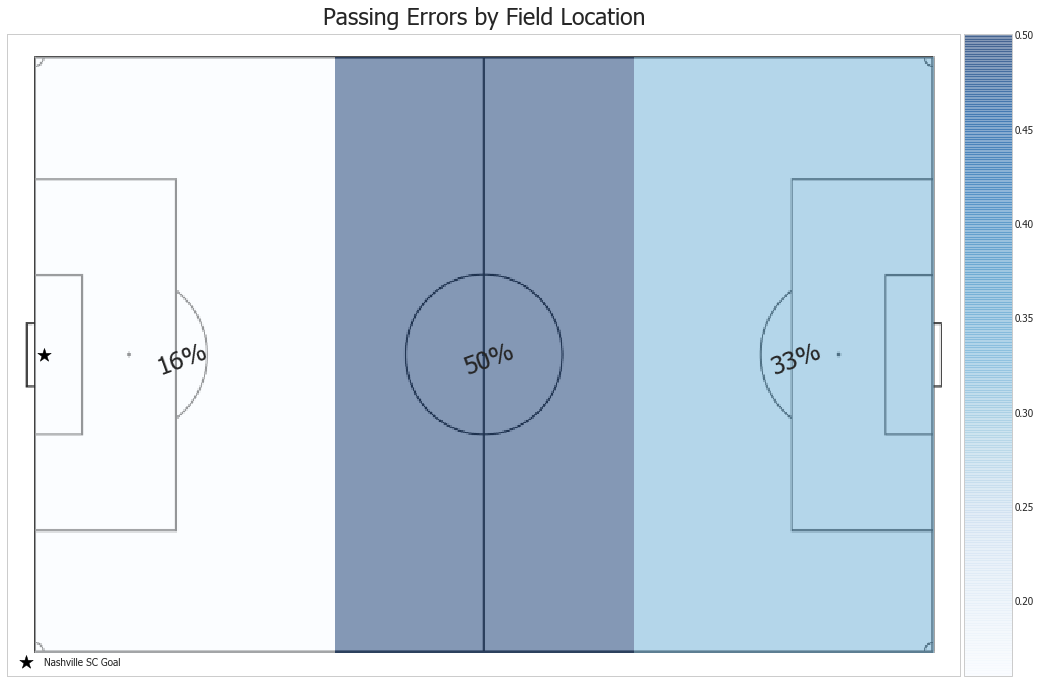

In [32]:
fig, ax = plt.subplots(figsize=(18, 13))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


img = plt.imread('../printable-soccer-field-diagram.png')
ax.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29), alpha=0.8)
im = ax.imshow(data1, cmap='Blues', alpha=0.5, extent=(-49, 49, -32.5, 32.5))

fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_xlim(-52, 52)
ax.set_ylim(-35, 35)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Passing Errors by Field Location', loc='center', size=23, pad=10)
ax.text(-2.5, -2, '50%',fontsize=25, rotation=20)
ax.text(-36, -2, '16%',fontsize=25, rotation=20)
ax.text(31, -2, '33%',fontsize=25, rotation=20)

ax.scatter(-48, 0, marker='*', s=200, c='k', label='Nashville SC Goal')
ax.legend(loc='lower left', fontsize='medium')
#plt.savefig('../Visuals/passingerrorby_fieldloc2.png', dpi=100)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Location of Start of Pass by Outcome')

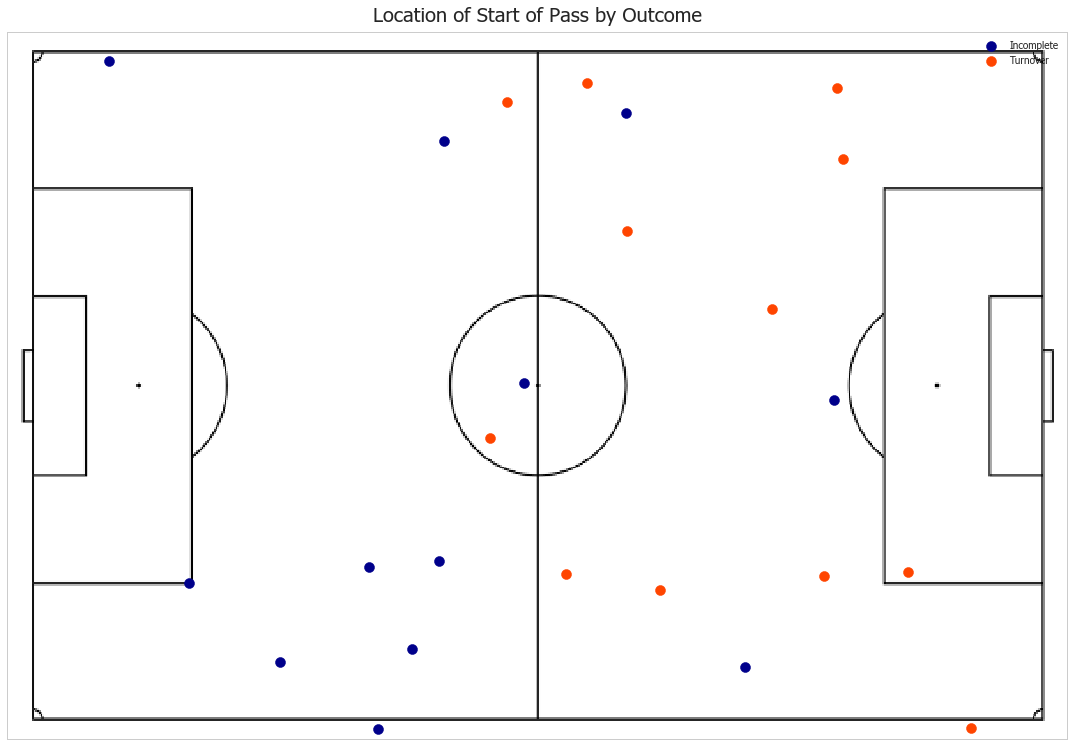

In [33]:
fig, ax = plt.subplots(figsize=(19, 18))
    
img = plt.imread('../printable-soccer-field-diagram.png')
ax.imshow(img, extent=(-51.44, 51.44, -34.29, 34.29))

#plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(success_idx)]['ball_y'], alpha=0.20, s=100, label='Successful', c='lightsteelblue')
plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(incomplete_idx)]['ball_y'], s=100, label='Incomplete', c='darkblue')
plt.scatter(tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)]['ball_x'], tracking_na[tracking_na['period'] == 1][tracking_na['frameIdx'].isin(turnover_idx)]['ball_y'], s=100, label='Turnover', c='orangered')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.title('Location of Start of Pass by Outcome', size=20, pad=10)
#plt.savefig('../Visuals/locationofpass_outcome.png', dpi=100)

## Turnovers and Incompletions on Right Flank

4/5 turnovers in attacking 3rd were forward passes, this could mean:
1. We played poor forward passes
2. The opposition was prepared for those forward passes and was able to proactively intercept them
3. We lack some technical ability on the right side of the field to play these types of passes

In [34]:
tracking_na[(tracking_na['frameIdx'].isin(incomplete_idx)) & (tracking_na['ball_y'] < -10.0) & (tracking_na['ball_x'] < 0)] #grabbing 6 incomplete passes in right defensive half

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,live,lastTouch,ball.xyz,ball.speed,ball_x,ball_y,ball_z
13420,1,13420,536.80,1583709610545,"[{'playerId': '41004', 'number': 33, 'xyz': [-...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-33.84, -19.19, -0.04]",10.05,-33.84,-19.19,-0.04
16145,1,16145,645.80,1583709719545,"[{'playerId': '41004', 'number': 33, 'xyz': [2...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[-15.45, -33.36, 0.16]",3.84,-15.45,-33.36,0.16
28269,1,28269,1130.76,1583710204505,"[{'playerId': '41004', 'number': 33, 'xyz': [5...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-25.0, -26.87, 0.25]",2.74,-25.00,-26.87,0.25
47578,1,47578,1903.12,1583710976865,"[{'playerId': '41004', 'number': 33, 'xyz': [9...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-12.2, -25.59, 0.34]",5.38,-12.20,-25.59,0.34
52875,1,52875,2115.00,1583711188745,"[{'playerId': '41004', 'number': 33, 'xyz': [1...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,away,"[-16.31, -17.61, 3.02]",4.57,-16.31,-17.61,3.02
62339,1,62339,2493.56,1583711567305,"[{'playerId': '41004', 'number': 33, 'xyz': [3...","[{'playerId': '119089', 'number': 10, 'xyz': [...",True,home,"[-9.5, -17.05, 2.29]",14.79,-9.50,-17.05,2.29


In [35]:
tracking_na[(tracking_na['frameIdx'].isin(incomplete_idx)) & (tracking_na['ball_y'] < -10.0) & (tracking_na['ball_x'] < 0)]['frameIdx'].values #frameIdx of incomplete passes on right of defensive half

array([13420, 16145, 28269, 47578, 52875, 62339])

In [37]:
right_flank_turnovers = right_flank_passes[right_flank_passes['passOutcome'] == 'turnover']['frameIdx'].astype(int).values #frameIdx of turnovers on right of attacking half
right_flank_turnovers

array([ 5455, 30431, 40489, 22545, 30698])

Player Locs: [[ 41.36  -4.73   0.  ]
 [ 33.9  -18.7    0.  ]
 [ 20.15 -15.31   0.  ]
 [ 34.55 -15.53   0.  ]
 [ 39.3    2.71   0.  ]
 [ 33.95   0.77   0.  ]
 [ 37.58  -4.11   0.  ]
 [ 43.51 -24.13   0.  ]
 [  4.29  -0.23   0.  ]
 [ 48.85  -2.37   0.  ]
 [ 40.95 -10.09   0.  ]]


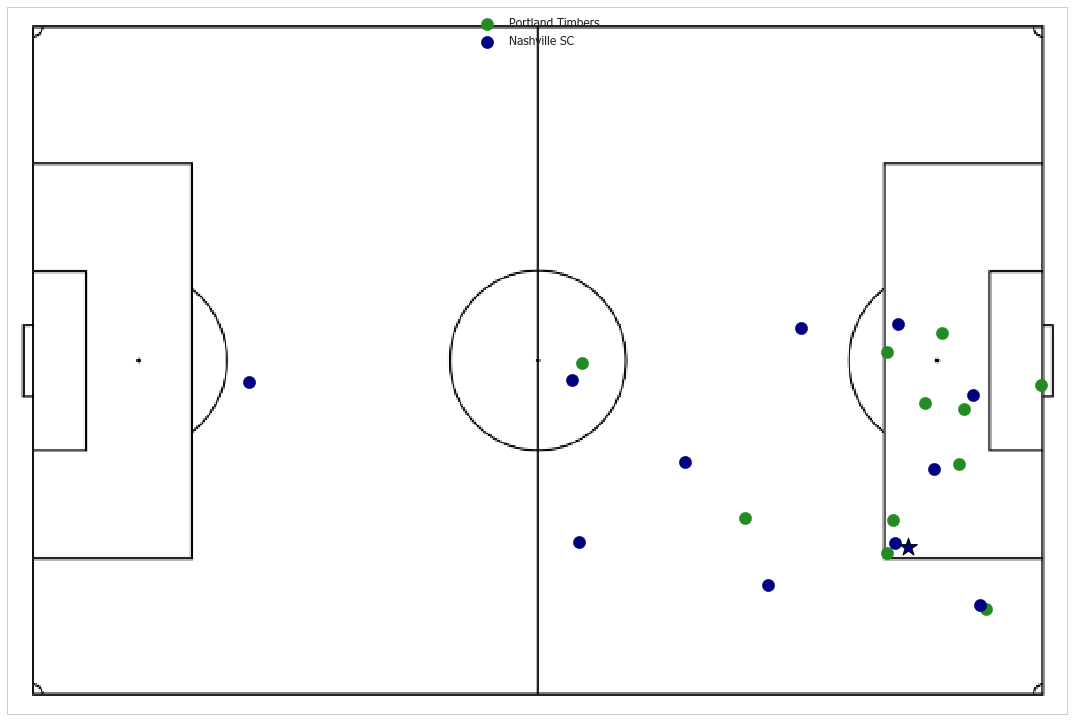

Time of Frame: 8.73 minutes
Player Locs: [[ 20.91 -11.09   0.  ]
 [  0.65 -28.57   0.  ]
 [-10.66 -17.06   0.  ]
 [ 17.   -14.78   0.  ]
 [ 16.79   4.72   0.  ]
 [ -5.91  -2.71   0.  ]
 [  9.84 -12.12   0.  ]
 [ 22.22 -17.7    0.  ]
 [ -5.02 -11.7    0.  ]
 [ 43.15  -1.34   0.  ]
 [ 10.93 -16.1    0.  ]]


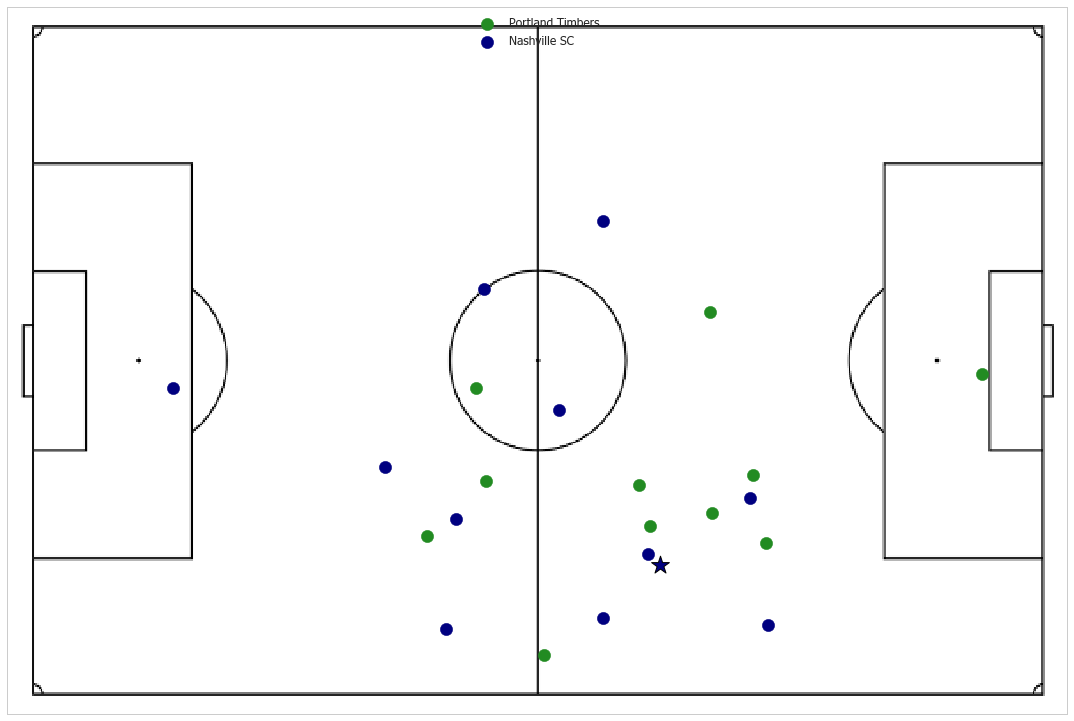

Time of Frame: 48.69 minutes
Player Locs: [[ 38.43  -1.03   0.  ]
 [ 26.47 -26.65   0.  ]
 [ 19.86 -16.46   0.  ]
 [ 30.55 -11.81   0.  ]
 [ 37.86   1.64   0.  ]
 [ 30.18  -0.     0.  ]
 [ 33.83 -13.91   0.  ]
 [ 35.56 -21.2    0.  ]
 [  5.17  -1.75   0.  ]
 [ 48.46  -1.22   0.  ]
 [ 30.86 -16.75   0.  ]]


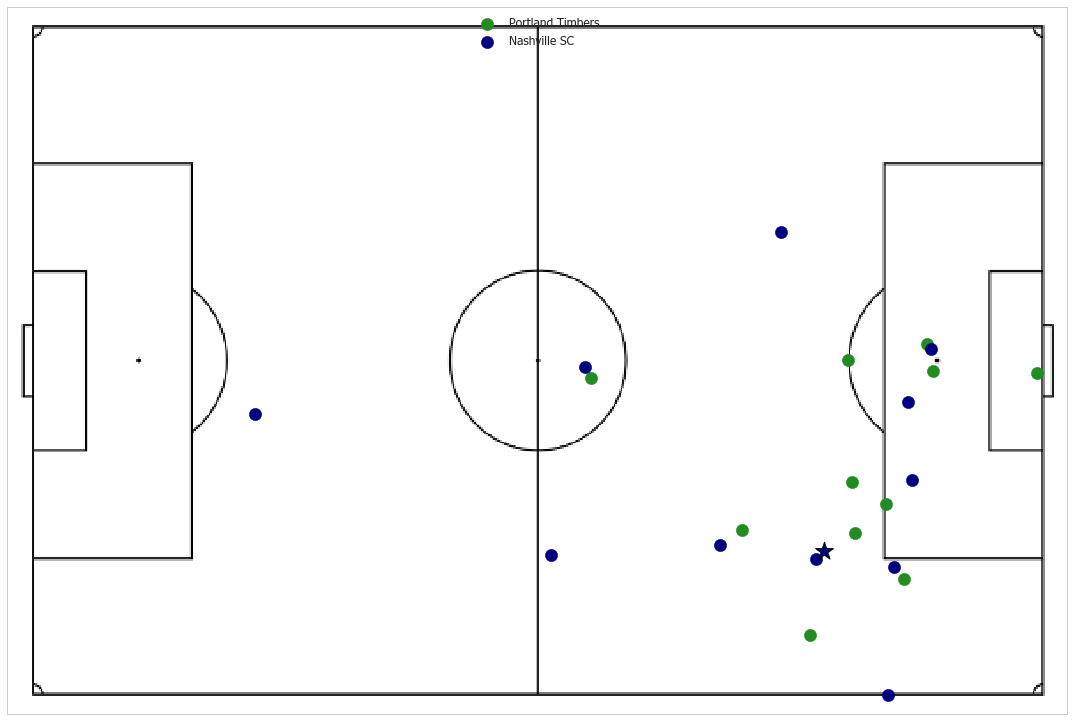

Time of Frame: 64.78 minutes
Player Locs: [[ 21.91   4.42   0.  ]
 [ 17.97 -16.34   0.  ]
 [  2.73 -13.94   0.  ]
 [ 12.35  -1.46   0.  ]
 [ 21.75  16.69   0.  ]
 [ 13.72  10.64   0.  ]
 [ 15.57  -9.1    0.  ]
 [ 22.72 -13.45   0.  ]
 [  2.2    2.87   0.  ]
 [ 40.2   -0.27   0.  ]
 [ 22.75  -4.08   0.  ]]


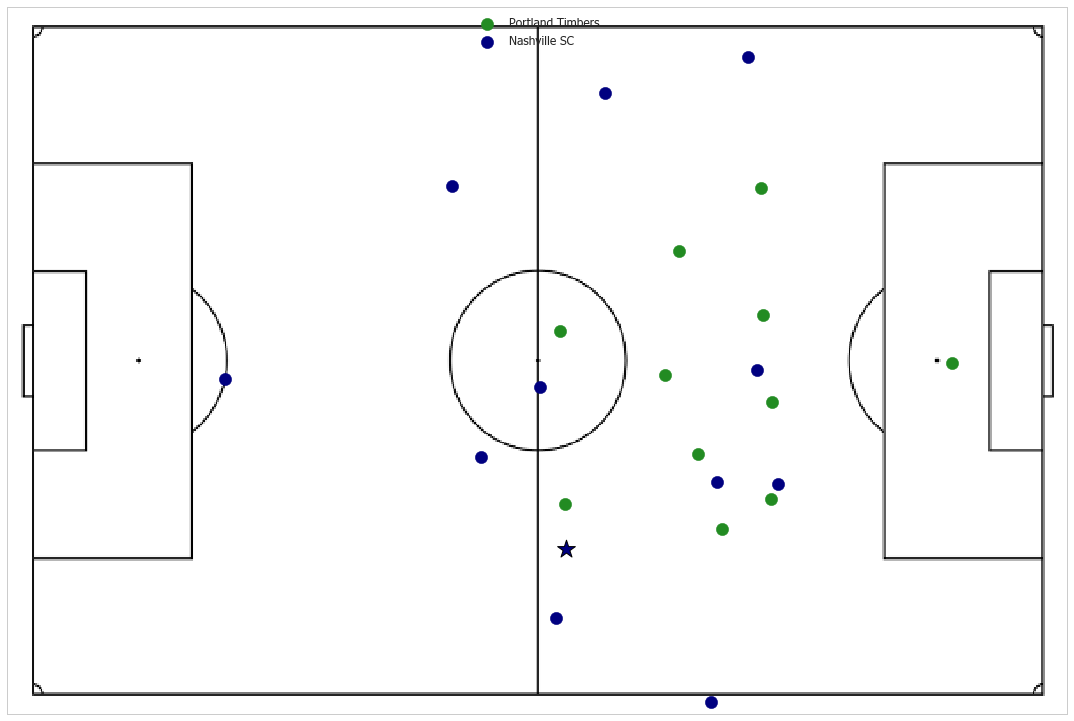

Time of Frame: 36.07 minutes
Player Locs: [[ 41.09  -1.79   0.  ]
 [ 32.77 -26.7    0.  ]
 [ 28.31 -20.95   0.  ]
 [ 41.09 -32.86   0.  ]
 [ 40.91   2.4    0.  ]
 [ 28.08  -8.26   0.  ]
 [ 35.7   -8.68   0.  ]
 [ 42.03 -31.37   0.  ]
 [  6.21  -8.37   0.  ]
 [ 48.38  -2.11   0.  ]
 [ 39.5  -13.2    0.  ]]


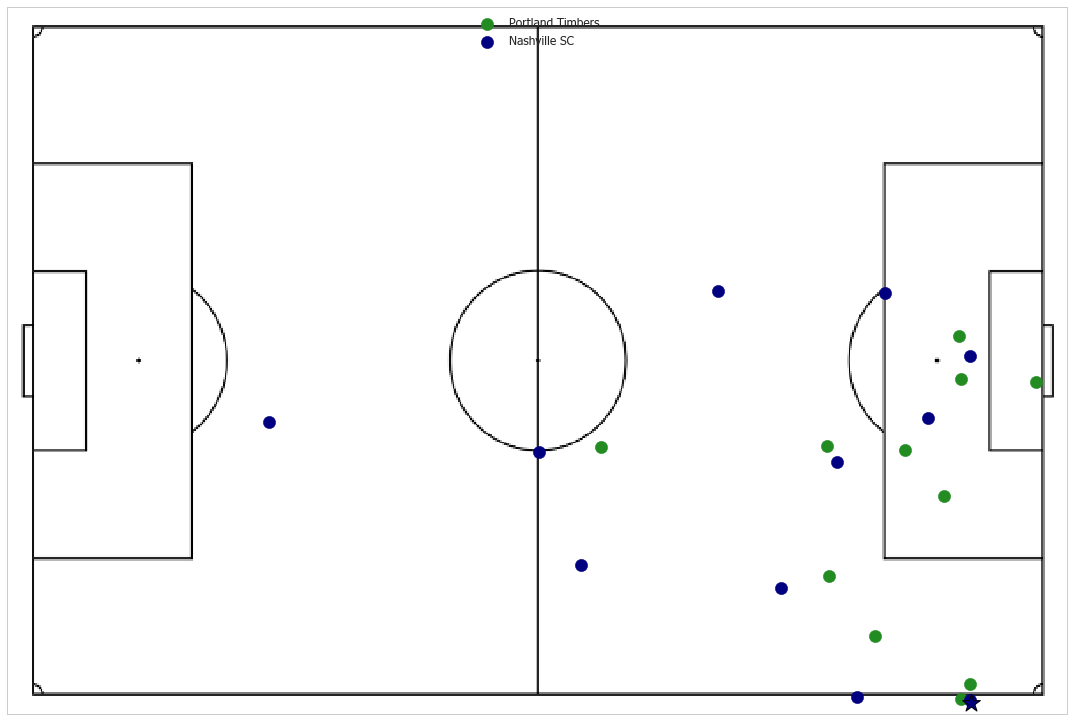

Time of Frame: 49.12 minutes


In [38]:
for frame in right_flank_turnovers:
    plotting_player_location_frame(frame)

In each of these cases we are pushing the ball forwards where there is little to no space.

In almost every snapshot, there is an empty gap in the midfield that could easily be found in 2 passes or less but unfortunately we dont have a player in that position asking for the ball.



## Much more to analyze and digest, excited to continue looking at this and coming up with deliverables that could effect how Nashville play and operate. 